## Phosphate Solubilizing Bacterial - Dataset

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
psb_data = pd.read_csv('resources/phosphate_solubilizing_bacteria.csv')
psb_data.head(10)

,Label no,pH,EC,Bulk_Density,Porosity,MC,Viability
0,1,5.72,108.3,1.25345,52.7,21.7,1
1,2,5.82,105.8,1.52110,42.6,10.8,0
2,3,6.73,123.3,1.44160,45.6,23.5,1
3,4,5.69,129.2,1.31705,50.3,15.3,1
4,5,5.68,99.1,1.27730,51.8,12.3,0
5,6,5.66,125.3,1.33560,49.6,18.7,1
6,7,5.77,113.3,1.55290,41.4,10.9,0
7,8,5.73,112.8,1.42570,46.2,19.3,1
8,9,5.78,100.5,1.31705,50.3,20.7,1
9,10,5.74,131.8,1.44160,45.6,18.6,1


In [3]:
psb_data.count()

Label no        1015
pH              1015
EC              1015
Bulk_Density    1015
Porosity        1015
MC              1015
Viability       1015
dtype: int64

### Observations and Analysis ###

In [4]:
psb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Label no      1015 non-null   int64  
 1   pH            1015 non-null   float64
 2   EC            1015 non-null   float64
 3   Bulk_Density  1015 non-null   float64
 4   Porosity      1015 non-null   float64
 5   MC            1015 non-null   float64
 6   Viability     1015 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 55.6 KB


In [5]:
psb_data.describe()

,Label no,pH,EC,Bulk_Density,Porosity,MC,Viability
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,508.000000,5.815281,104.785074,1.404561,46.911783,15.633153,0.498522
std,293.149564,0.285896,25.100683,0.149598,5.682429,4.050141,0.500244
min,1.000000,4.090000,34.900000,1.022900,8.300000,4.200000,0.000000
25%,254.500000,5.690000,85.650000,1.306450,44.200000,12.550000,0.000000
50%,508.000000,5.790000,105.700000,1.388600,47.600000,15.300000,0.000000
75%,761.500000,5.920000,118.500000,1.476050,50.700000,18.500000,1.000000
max,1015.000000,6.810000,252.000000,2.430050,61.400000,29.300000,1.000000


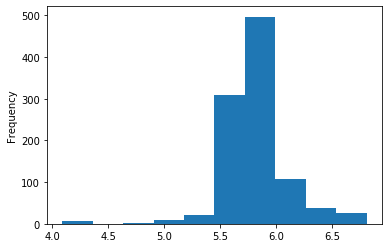

In [6]:
psb_data['pH'].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021422E5A1D0>,
      dtype=object)

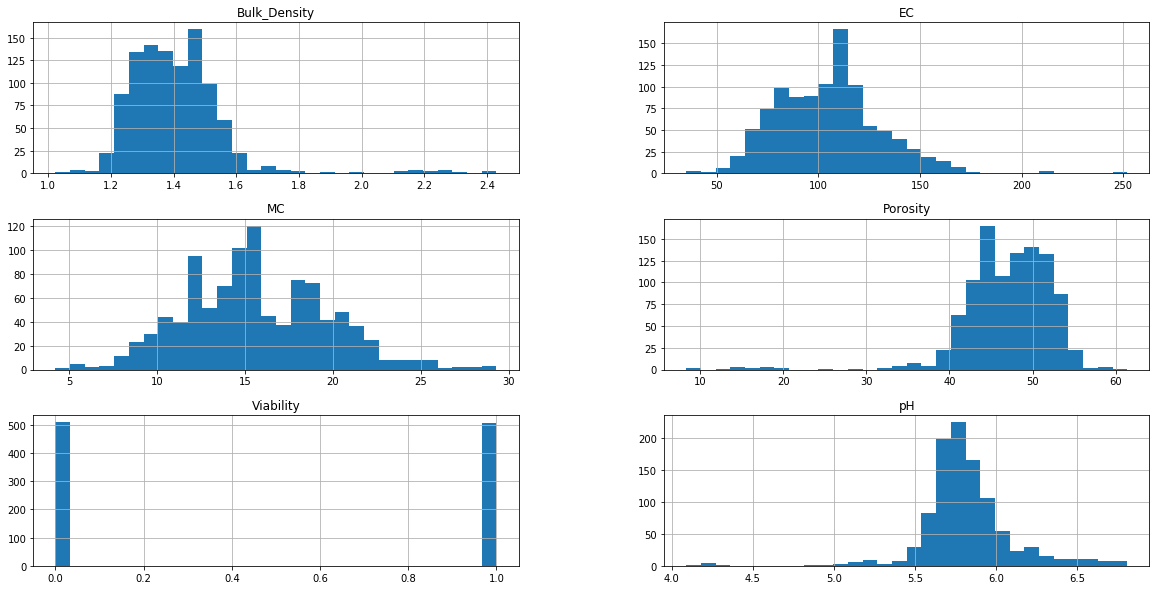

In [46]:
psb_data.hist(bins=30, figsize=(20, 10))

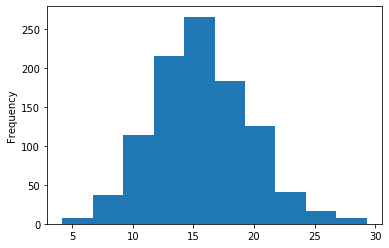

In [7]:
psb_data['MC'].plot.hist()

### Data Cleaning (Wrangling) ###

In [8]:
psb_data.isnull().head(5)

,Label no,pH,EC,Bulk_Density,Porosity,MC,Viability
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [9]:
psb_data.isnull().sum()

Label no        0
pH              0
EC              0
Bulk_Density    0
Porosity        0
MC              0
Viability       0
dtype: int64

### Find missing data ###

#### Removing unwanted fields ####
Balancing data - Phase I

```
Completely unique values 
Completely constant values
```

In [10]:
psb_data.drop('Label no', axis=1, inplace=True)

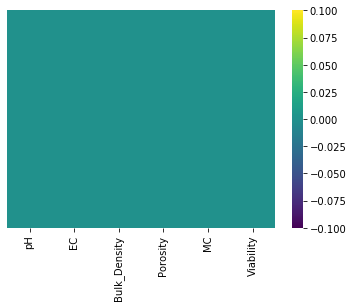

In [11]:
sns.heatmap(psb_data.isnull(), yticklabels=False, cmap='viridis')

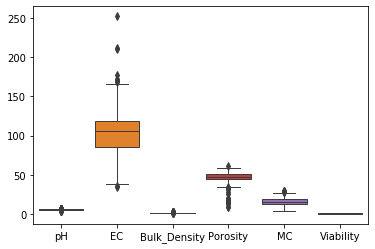

In [12]:
sns.boxplot(data=psb_data,linewidth=1)

From the plot, we can see that there are few outliers present in column EC and Porosity

In [13]:
psb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pH            1015 non-null   float64
 1   EC            1015 non-null   float64
 2   Bulk_Density  1015 non-null   float64
 3   Porosity      1015 non-null   float64
 4   MC            1015 non-null   float64
 5   Viability     1015 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.7 KB


In [14]:
psb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pH            1015 non-null   float64
 1   EC            1015 non-null   float64
 2   Bulk_Density  1015 non-null   float64
 3   Porosity      1015 non-null   float64
 4   MC            1015 non-null   float64
 5   Viability     1015 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.7 KB


### Training Models ###

#### Prepare Data ####

#### Check the balance of data

In [15]:
psb_data['Viability'].value_counts()

0    509
1    506
Name: Viability, dtype: int64

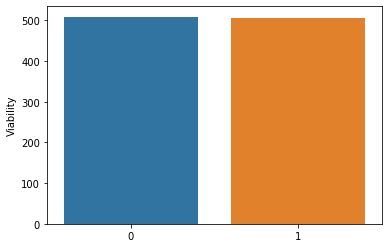

In [17]:
sns.barplot(x=psb_data.Viability.value_counts().index, y=psb_data.Viability.value_counts())

In [18]:
X = psb_data.drop(['Viability', 'Label no'], axis=1) #indep. features
y = psb_data['Viability'] #dep. feature

In [19]:
X

,pH,EC,Bulk_Density,Porosity,MC
0,5.72,108.3,1.25345,52.7,21.7
1,5.82,105.8,1.52110,42.6,10.8
2,6.73,123.3,1.44160,45.6,23.5
3,5.69,129.2,1.31705,50.3,15.3
4,5.68,99.1,1.27730,51.8,12.3
...,...,...,...,...,...
1010,6.27,75.2,1.47870,44.2,14.8
1011,6.05,111.8,1.25875,52.5,19.3
1012,6.28,114.8,1.27730,51.8,14.7
1013,6.32,58.8,1.52375,42.5,13.5


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

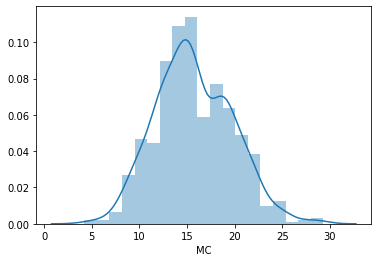

In [20]:
sns.distplot(X_train['MC'])

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

### Logistic Regression

In [21]:
import sklearn.metrics as metrics

lr_classifier = LogisticRegression(max_iter=1000)
desc = lr_classifier.fit(X_train, y_train)
print(desc)
y_pred = lr_classifier.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

LogisticRegression(max_iter=1000)
[[118  39]
 [ 26 122]]
0.7868852459016393
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       157
           1       0.76      0.82      0.79       148

    accuracy                           0.79       305
   macro avg       0.79      0.79      0.79       305
weighted avg       0.79      0.79      0.79       305



In [21]:
import sklearn.metrics as metrics

def print_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy score:\n', metrics.accuracy_score(y_test, y_pred))
    print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
    print('Classification report:\n', metrics.classification_report(y_test, y_pred, digits=4))
    print('Precision:\n',metrics.precision_score(y_test, y_pred))
    print('Recall:\n',metrics.recall_score(y_test, y_pred))

### Use of trained model for new data prediction

In [67]:
new_data = np.array([[5.0,110.0,1.00,45.4,15]])

print(lr_classifier.predict(new_data))
print(lr_classifier.predict_proba(new_data))

[0]
[[0.61149808 0.38850192]]


### Save model for future use (use of pickle and joblib modules)

In [68]:
#!pip install pickle-mixin
#!pip install joblib

import pickle
import joblib

filename_pkl = 'psb_lr_model.pkl'
saved_model = pickle.dump(lr_classifier, open(filename_pkl, 'wb'))

filename_jblb = 'psb_lr_model.jblb'
joblib.dump(lr_classifier, filename_jblb)

['psb_lr_model.jblb']

### Load a saved model

In [26]:
#Pickle
print('\n--- Pickle ---- ')
loaded_model = pickle.load(open(filename_pkl, 'rb'))
print_model_performance(loaded_model, X_test, y_test)

#Joblib
print('\n--- Joblib ---- ')
loaded_model = joblib.load(filename_jblb)
print_model_performance(loaded_model, X_test, y_test)


--- Pickle ---- 
Accuracy score:
 0.780327868852459
Confusion matrix:
 [[120  37]
 [ 30 118]]
Classification report:
               precision    recall  f1-score   support

           0     0.8000    0.7643    0.7818       157
           1     0.7613    0.7973    0.7789       148

    accuracy                         0.7803       305
   macro avg     0.7806    0.7808    0.7803       305
weighted avg     0.7812    0.7803    0.7804       305

Precision:
 0.7612903225806451
Recall:
 0.7972972972972973

--- Joblib ---- 
Accuracy score:
 0.780327868852459
Confusion matrix:
 [[120  37]
 [ 30 118]]
Classification report:
               precision    recall  f1-score   support

           0     0.8000    0.7643    0.7818       157
           1     0.7613    0.7973    0.7789       148

    accuracy                         0.7803       305
   macro avg     0.7806    0.7808    0.7803       305
weighted avg     0.7812    0.7803    0.7804       305

Precision:
 0.7612903225806451
Recall:
 0.7972972

#### Hyperparameter tuning for Logistic Regression (Solver, C and Penalty)

In [13]:
lr_classifier = LogisticRegression()
lr_C = np.array([0.01, 0.1, 1, 10, 100])
lr_penalty = ['l2']  #'l1', 'elasticnet'
lr_solver = ['lbfgs'] #'liblinear', 'sag'

grid_values = {'C': lr_C, 'penalty': lr_penalty, 'solver': lr_solver}
cross_validation = KFold(n_splits=5, shuffle=False)
lrc_grid = GridSearchCV(lr_classifier, param_grid=grid_values, 
                        cv=cross_validation, n_jobs=-1, scoring='f1_macro')

desc = lrc_grid.fit(X_train, y_train)
print(desc)
print_model_performance(lrc_grid, X_test, y_test)

print("\n The best parameters across ALL searched params:\n",lrc_grid.best_params_)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l2'], 'solver': ['lbfgs']},
             scoring='f1_macro')
Accuracy score:
 0.7770491803278688
Confusion matrix:
 [[120  37]
 [ 31 117]]
Classification report:
               precision    recall  f1-score   support

           0     0.7947    0.7643    0.7792       157
           1     0.7597    0.7905    0.7748       148

    accuracy                         0.7770       305
   macro avg     0.7772    0.7774    0.7770       305
weighted avg     0.7777    0.7770    0.7771       305

Precision:
 0.7597402597402597
Recall:
 0.7905405405405406

 The best parameters across ALL searched params:
 {'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}


### Naive Bayes classifier

In [22]:
nb_classifier = GaussianNB() 
nb_classifier.fit(X_train, y_train)  #model train

desc = nb_classifier.fit(X_train, y_train)  #model train and assign to a new variable
print(desc)
print_model_performance(nb_classifier, X_test, y_test)  #function created before

GaussianNB()
Accuracy score:
 0.8655737704918033
Confusion matrix:
 [[132  25]
 [ 16 132]]
Classification report:
               precision    recall  f1-score   support

           0     0.8919    0.8408    0.8656       157
           1     0.8408    0.8919    0.8656       148

    accuracy                         0.8656       305
   macro avg     0.8663    0.8663    0.8656       305
weighted avg     0.8671    0.8656    0.8656       305

Precision:
 0.8407643312101911
Recall:
 0.8918918918918919


### K-Nearest Neighbors (KNN)

In [23]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)

desc = knn_classifier.fit(X_train, y_train)
print(desc)
print_model_performance(knn_classifier, X_test, y_test)

KNeighborsClassifier(n_neighbors=4)
Accuracy score:
 0.8786885245901639
Confusion matrix:
 [[134  23]
 [ 14 134]]
Classification report:
               precision    recall  f1-score   support

           0     0.9054    0.8535    0.8787       157
           1     0.8535    0.9054    0.8787       148

    accuracy                         0.8787       305
   macro avg     0.8795    0.8795    0.8787       305
weighted avg     0.8802    0.8787    0.8787       305

Precision:
 0.8535031847133758
Recall:
 0.9054054054054054


### Suppot Vector Machine (SVM)

In [24]:
from sklearn import svm
svm_classifier = svm.SVC() #default kernal is Radial Basis Function (RBF) kernel.

svm_classifier.fit(X_train, y_train)
print_model_performance(svm_classifier, X_test, y_test)

KNeighborsClassifier(n_neighbors=4)
Accuracy score:
 0.780327868852459
Confusion matrix:
 [[105  52]
 [ 15 133]]
Classification report:
               precision    recall  f1-score   support

           0     0.8750    0.6688    0.7581       157
           1     0.7189    0.8986    0.7988       148

    accuracy                         0.7803       305
   macro avg     0.7970    0.7837    0.7785       305
weighted avg     0.7993    0.7803    0.7779       305

Precision:
 0.7189189189189189
Recall:
 0.8986486486486487


In [25]:
import sklearn.metrics as metrics

for C in [1, 10, 100, 1000, 10000]:
    for kernal in ['rbf', 'linear', 'poly']:
        svm_classifier = svm.SVC(C=C, kernel=kernal) #similarly, gamma=0.01, 0.5, 
        svm_classifier.fit(X_train, y_train)
        y_pred = svm_classifier.predict(X_test)
        scores = metrics.accuracy_score(y_test, y_pred)
        print(f'C={C:<10} kernal={kernal:<10} accuracy score={scores: .2%}')

C=1    kernal=rbf        accuracy score= 78.033%
C=1    kernal=linear     accuracy score= 79.344%
C=1    kernal=poly       accuracy score= 67.541%
C=10   kernal=rbf        accuracy score= 79.672%
C=10   kernal=linear     accuracy score= 79.016%
C=10   kernal=poly       accuracy score= 68.525%
C=100  kernal=rbf        accuracy score= 81.311%
C=100  kernal=linear     accuracy score= 79.672%
C=100  kernal=poly       accuracy score= 73.770%
C=1000 kernal=rbf        accuracy score= 87.213%
C=1000 kernal=linear     accuracy score= 77.705%
C=1000 kernal=poly       accuracy score= 82.295%
C=10000 kernal=rbf        accuracy score= 90.492%
C=10000 kernal=linear     accuracy score= 77.049%
C=10000 kernal=poly       accuracy score= 87.869%


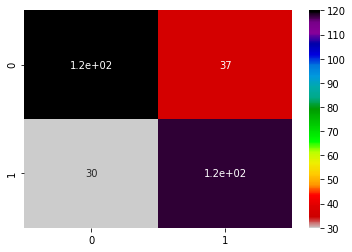

In [30]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='nipy_spectral_r')

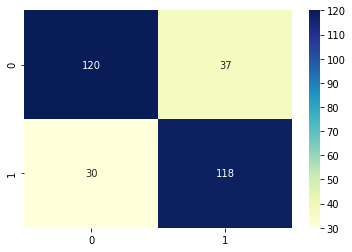

In [31]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')  #cmap = Blues

### Receiver Operating Characteristic Curve (ROC Curve) 

#### Area Under the Curve: AUC - ROC 
AUC - ROC curve is a performance measurement for the classification problems at various threshold settings.
ROC is a probability curve and AUC represents the degree or measure of separability.
Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1

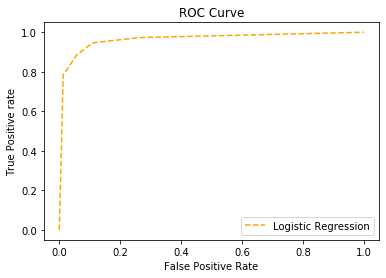

In [32]:
from sklearn.metrics import roc_curve

pred_prob = knn_classifier.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

plt.plot(fpr, tpr, linestyle='--',color='orange', label='KNN')

# title
plt.title('ROC Curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=7, random_state=17)   
dt_classifier.fit(X_train,y_train)

print(dt_classifier)
print_model_performance(dt_classifier, X_test, y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)
Accuracy score:
 0.9639344262295082
Confusion matrix:
 [[151   6]
 [  5 143]]
Classification report:
               precision    recall  f1-score   support

           0     0.9679    0.9618    0.9649       157
           1     0.9597    0.9662    0.9630       148

    accuracy                         0.9639       305
   macro avg     0.9638    0.9640    0.9639       305
weighted avg     0.9640    0.9639    0.9639       305

Precision:
 0.959731543624161
Recall:
 0.9662162162162162


In [28]:
#Hyperparameter training with iterations
import sklearn.metrics as metrics

for md in range(1, 11, 1):
    for crt in ['gini', 'entropy']:
        dt_classifier = DecisionTreeClassifier(criterion=crt, max_depth=md, random_state=17)   
        dt_classifier.fit(X_train,y_train)
        y_pred = dt_classifier.predict(X_test)
        scores = metrics.accuracy_score(y_test, y_pred)
        print(f'k={md:<4} criterion={crt:<10} accuracy score={scores: .2%}')

k=1    criterion=gini       accuracy score= 81.639%
k=1    criterion=entropy    accuracy score= 81.639%
k=2    criterion=gini       accuracy score= 91.148%
k=2    criterion=entropy    accuracy score= 91.475%
k=3    criterion=gini       accuracy score= 96.721%
k=3    criterion=entropy    accuracy score= 96.721%
k=4    criterion=gini       accuracy score= 97.705%
k=4    criterion=entropy    accuracy score= 97.377%
k=5    criterion=gini       accuracy score= 97.705%
k=5    criterion=entropy    accuracy score= 97.705%
k=6    criterion=gini       accuracy score= 97.049%
k=6    criterion=entropy    accuracy score= 96.721%
k=7    criterion=gini       accuracy score= 96.721%
k=7    criterion=entropy    accuracy score= 96.393%
k=8    criterion=gini       accuracy score= 97.049%
k=8    criterion=entropy    accuracy score= 96.393%
k=9    criterion=gini       accuracy score= 97.049%
k=9    criterion=entropy    accuracy score= 96.393%
k=10   criterion=gini       accuracy score= 97.049%
k=10   crite

In [34]:
from sklearn.tree import export_text

r = export_text(dt_classifier, feature_names=list(X.columns))
print(r)

|--- EC <= 94.70
|   |--- EC <= 42.00
|   |   |--- class: 1
|   |--- EC >  42.00
|   |   |--- Bulk_Density <= 1.45
|   |   |   |--- class: 0
|   |   |--- Bulk_Density >  1.45
|   |   |   |--- class: 0
|--- EC >  94.70
|   |--- Bulk_Density <= 1.48
|   |   |--- EC <= 140.65
|   |   |   |--- class: 1
|   |   |--- EC >  140.65
|   |   |   |--- class: 0
|   |--- Bulk_Density >  1.48
|   |   |--- EC <= 135.05
|   |   |   |--- class: 0
|   |   |--- EC >  135.05
|   |   |   |--- class: 0



In [ ]:
#Export the Decision Tree to an image.
#Compare ID3 DT classifier with C4.5 classifier.

## Ensemble Techniques
1) Use of multiple learning algorithms together for the same task

2) Better predictions than individual learning models

#### Features
1) Better accuracy (low error)
2) Higher consistency (avoid overfitting, specially when decision trees overfitting)
3) Reduces bias and varience errors

#### There are two ensemble techniques
1) Bagging

2) Boosting

### Bagging (Bootstrap Aggregation)
### Random Forest Classifier

In Ensemble Learning, instead of using a single predictor, multiple predictors and training in the data and their results are aggregated, usually giving a better score than using a single model. A Random Forest, for instance, is simply an ensemble of bagged(or pasted) Decision Trees.

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
print_model_performance(rf_classifier, X_test, y_test)

Accuracy score:
 0.9770491803278688
Confusion matrix:
 [[155   2]
 [  5 143]]
Classification report:
               precision    recall  f1-score   support

           0     0.9688    0.9873    0.9779       157
           1     0.9862    0.9662    0.9761       148

    accuracy                         0.9770       305
   macro avg     0.9775    0.9767    0.9770       305
weighted avg     0.9772    0.9770    0.9770       305

Precision:
 0.9862068965517241
Recall:
 0.9662162162162162


In [78]:
for md in range(1, 15, 1):
    for crt in ['gini', 'entropy']:
        rf_classifier = RandomForestClassifier(criterion=crt, max_depth=md)
        rf_classifier.fit(X_train, y_train)
        y_pred = rf_classifier.predict(X_test)
        scores = metrics.accuracy_score(y_test, y_pred)
        print(f'k={md:<4} criterion={crt:<10} accuracy score={scores: .3%}')

k=1    criterion=gini       accuracy score= 91.475%
k=1    criterion=entropy    accuracy score= 91.475%
k=2    criterion=gini       accuracy score= 91.475%
k=2    criterion=entropy    accuracy score= 91.148%
k=3    criterion=gini       accuracy score= 91.148%
k=3    criterion=entropy    accuracy score= 91.475%
k=4    criterion=gini       accuracy score= 97.049%
k=4    criterion=entropy    accuracy score= 94.426%
k=5    criterion=gini       accuracy score= 97.049%
k=5    criterion=entropy    accuracy score= 96.393%
k=6    criterion=gini       accuracy score= 97.049%
k=6    criterion=entropy    accuracy score= 97.377%
k=7    criterion=gini       accuracy score= 97.049%
k=7    criterion=entropy    accuracy score= 97.049%
k=8    criterion=gini       accuracy score= 96.721%
k=8    criterion=entropy    accuracy score= 97.049%
k=9    criterion=gini       accuracy score= 96.721%
k=9    criterion=entropy    accuracy score= 97.049%
k=10   criterion=gini       accuracy score= 96.721%
k=10   crite

### Boosting
Boosting is a special type of Ensemble Learning technique that works by combining several weak learners(predictors with poor accuracy) into a strong learner(a model with strong accuracy). This works by each model paying attention to its predecessor’s mistakes.
1) Adaptive Boosting (AKA AdaBoost algorithm)

The model initially gives equal weights to all the data points. It then assigns higher weights to points that are wrongly classified. Now all the points which have higher weights are given more importance in the next model. It will keep training models until and unless a lowe error is received.

2) Gradient Boosting

In Gradient Boosting, each predictor tries to improve on its predecessor by reducing the errors.

3) Xtreme gradient descent algorithm (XGBoost)

#### XGBoost

In [36]:
#install
!pip --user install xgboost

In [30]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(use_label_encoder=False)
print(xgb_classifier)
xgb_classifier.fit(X_train, y_train)
print_model_performance(xgb_classifier, X_test, y_test)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=False,
              validate_parameters=None, verbosity=None)
[14:45:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd

### Neural Network Classifier ###

In [26]:
from sklearn import neural_network

nn_classifier = neural_network.MLPClassifier(max_iter=50000)
nn_classifier.fit(X_train, y_train)
y_pred = nn_classifier.predict(X_test)

In [27]:
print_model_performance(nn_classifier, X_test, y_test)

Accuracy score:
 0.8655737704918033
Confusion matrix:
 [[131  26]
 [ 15 133]]
Classification report:
               precision    recall  f1-score   support

           0     0.8973    0.8344    0.8647       157
           1     0.8365    0.8986    0.8664       148

    accuracy                         0.8656       305
   macro avg     0.8669    0.8665    0.8656       305
weighted avg     0.8678    0.8656    0.8655       305

Precision:
 0.8364779874213837
Recall:
 0.8986486486486487


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 609 to 623
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pH            710 non-null    float64
 1   EC            710 non-null    float64
 2   Bulk_Density  710 non-null    float64
 3   Porosity      710 non-null    float64
 4   MC            710 non-null    float64
dtypes: float64(5)
memory usage: 33.3 KB
